In [4]:
from typing import Optional

# 138. Copy List with Random Pointer

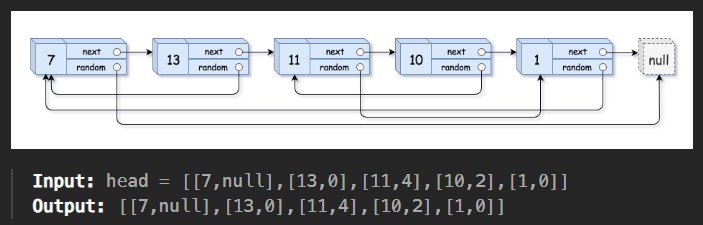

In [5]:
class Node:
    def __init__(self, x: int, next: 'Node' = None, random: 'Node' = None):
        self.val = int(x)
        self.next = next
        self.random = random
class Solution:
    def copyRandomList(self, head: 'Optional[Node]') -> 'Optional[Node]':
        if not head:
            return None
        
        # Step 1: Insert new nodes
        current = head
        while current:
            new_node = Node(current.val, current.next)
            current.next = new_node
            current = new_node.next
        
        # Step 2: Set random pointers
        current = head
        while current:
            if current.random:
                current.next.random = current.random.next
            current = current.next.next
        
        # Step 3: Separate the lists
        old_list = head
        new_list = head.next
        new_head = head.next
        
        while old_list:
            old_list.next = old_list.next.next
            if new_list.next:
                new_list.next = new_list.next.next
            old_list = old_list.next
            new_list = new_list.next
        
        return new_head


# 92. Reverse Linked List II

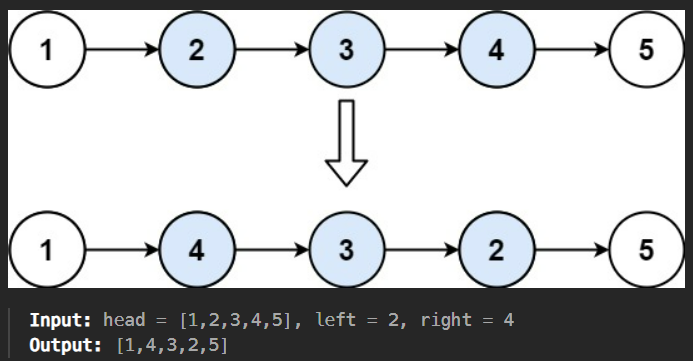

In [8]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
class Solution:
    def reverseBetween(self, head: Optional[ListNode], left: int, right: int) -> Optional[ListNode]:
        if not head or left == right:
            return head
        
        dummy = ListNode(0)
        current = dummy
        dummy.next = head
            
        prev = None
        for _ in range(left - 1):
            current = current.next
        
        left_node = current
        current = current.next
        
        for i in range(right-left+1):
            # 記錄第一個要反轉的節點
            if not prev:
                first_reverse_node = current
                
            # 記錄下一個節點
            next_node = current.next  
            current.next = prev
            prev = current
            # 更新當前節點
            current = next_node
    
        left_node.next = prev
        first_reverse_node.next = current
 
        return dummy.next
        

# 82. Remove Duplicates from Sorted List II

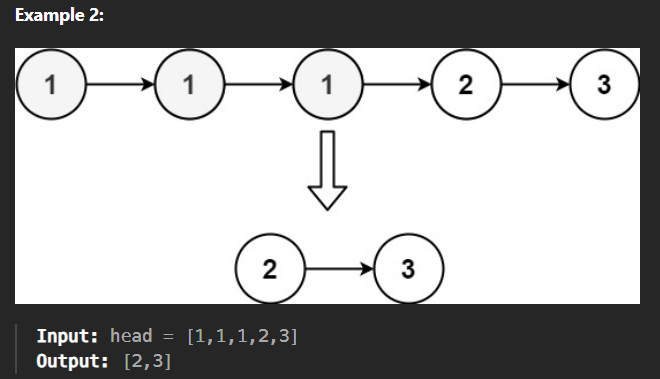

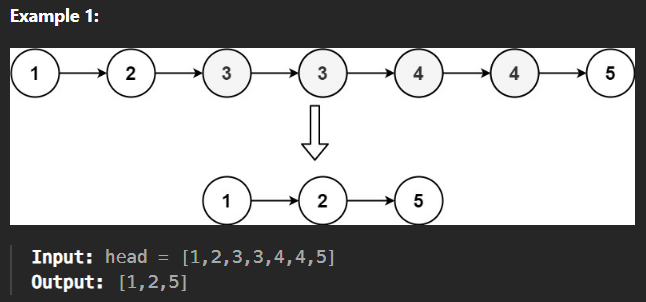

In [9]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
class Solution:
    def deleteDuplicates(self, head: Optional[ListNode]) -> Optional[ListNode]:
        
        # 創建一個虛擬節點（dummy node）
        dummy = ListNode(0, head)
        # 設置前驅節點為虛擬節點
        prev = dummy
        current = head

        while current:
            # 如果當前節點和下一個節點值相同
            if current.next and current.val == current.next.val:
                # 跳過所有具有相同值的節點
                while current.next and current.val == current.next.val:
                    current = current.next
                # 把前驅節點的 next 指向與當前節點值不同的節點
                # 更新到遇到第一個不重複值
                prev.next = current.next
            else:
                # 如果當前節點值不同，前驅節點前進一位
                prev = prev.next
            
            # 當前節點前進一位
            current = current.next
        
        return dummy.next